In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
import re

In [6]:
path=untar_data(URLs.PETS);path

WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet/annotations'),
 WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet/images')]

In [8]:
path_annot=path/'annotations'
path_img=path/'images'

In [9]:
fname=get_image_files(path_img)
fname[:4]

[WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg')]

In [10]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

In [11]:
data=ImageDataBunch.from_name_re(path_img,fname,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\user\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\user\.fastai\data\oxford-iiit-pet\images;

Test: None

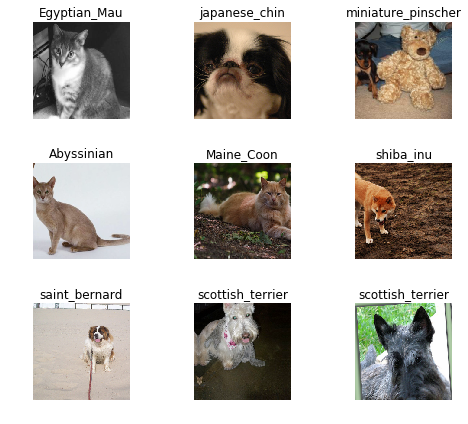

In [12]:
data.show_batch(rows=3,figsize=(7,6))

In [13]:
print(data.classes)
len(data.classes),data.c 

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [16]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)
learn.fit_one_cycle(4)

C:\Users\user\Anaconda3\Lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,1.384992,0.349971,0.113667,54:06
1,0.596330,0.314157,0.098782,42:32
2,0.380725,0.252957,0.079161,40:00
3,0.279500,0.253118,0.080514,40:46


In [17]:
# learn knows the data and model and now it will store coefficients and parameter
learn.save('stage_1')
intepret=ClassificationInterpretation.from_learner(learn)

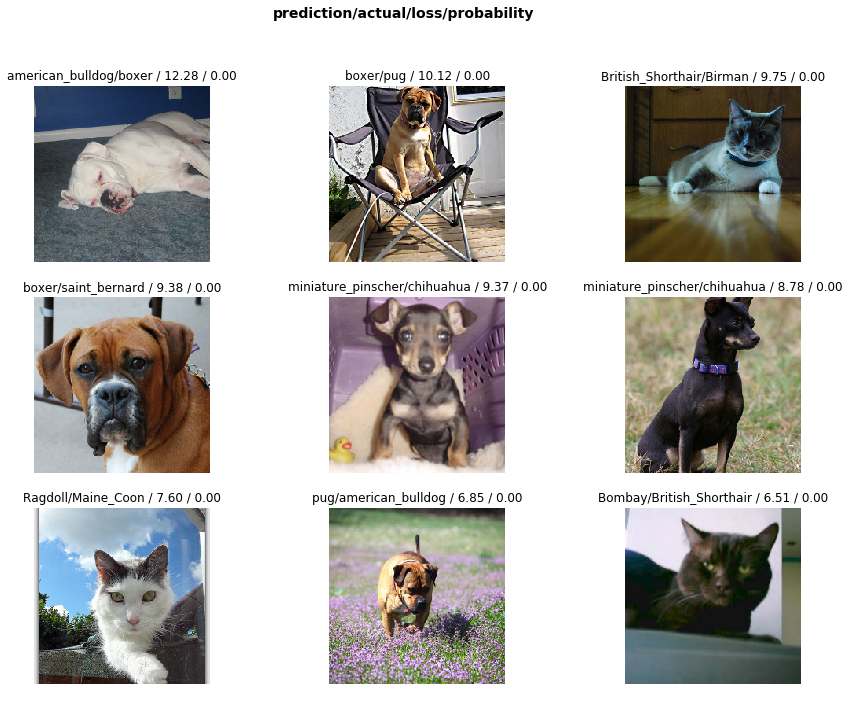

In [19]:
intepret.plot_top_losses(9,figsize=(15,11))